#### Case Study - 10 on Probability

#### Problem Statement: ( Mushroom Dataset)

To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

#### Importing relevant libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score,recall_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


##### Reading the dataset into Python Environment :-

In [2]:
dataset = pd.read_csv('mushrooms.csv')
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### Checking the basic details of the dataset:


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
dataset.shape

(8124, 23)

In [5]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
dataset.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2805,e,f,y,e,t,n,f,c,b,w,...,s,w,p,p,w,o,p,k,y,d
1347,e,x,s,w,f,n,f,w,b,p,...,f,w,w,p,w,o,e,k,s,g
5852,p,f,y,y,f,f,f,c,b,g,...,k,p,p,p,w,o,l,h,y,g
7556,p,k,s,n,f,y,f,c,n,b,...,k,w,p,p,w,o,e,w,v,l
360,e,x,f,n,f,n,f,w,b,h,...,f,w,w,p,w,o,e,n,s,g
4581,p,x,y,g,f,f,f,c,b,p,...,k,n,n,p,w,o,l,h,v,p
7785,p,k,s,n,f,s,f,c,n,b,...,s,w,p,p,w,o,e,w,v,l
5515,e,f,y,w,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
2167,e,x,f,g,t,n,f,c,b,p,...,s,p,g,p,w,o,p,k,y,d
5963,p,f,y,b,t,n,f,c,b,g,...,s,w,w,p,w,t,p,r,v,g


In [7]:
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

######    Insights :- 
            The dataset consists of 8124 rows with 23 columns and all the features are of Categorical datatype.

#### Necessary Preprocessing Steps to be done :-

###### 1. Checking the missing values or nulls in the dataset.

In [9]:
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

        There are no missing values in this dataset.

In [10]:
dataset["class"].unique()



array(['p', 'e'], dtype=object)

In [11]:
print('p = 1 is Poisonous and e = 0 is Edible')

p = 1 is Poisonous and e = 0 is Edible


#### Feature Engineering :-

##### Manipulating Data-

Changing the class column as 1 or 0 inorder to use 'p' as 1 and 'e' as 0.

In [12]:
dataset["class"] = [1 if i == "p" else 0 for i in dataset["class"]]

dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
dataset['class'].unique()

array([1, 0], dtype=int64)

##### Analyzing the target variable as "class" in the column which is a categorical feature :-

In [14]:
dataset['class']

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

#### Exploratory Data Analysis

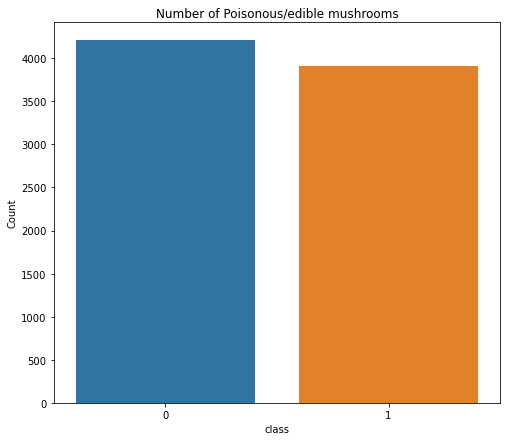

In [15]:
dataset['class'].value_counts()
plt.figure(figsize=(8,7))

sns.countplot(dataset['class'])
    
plt.title("Number of Poisonous/edible mushrooms")
plt.ylabel("Count")
plt.show()

Poisonous Mushrooms are denoted as 1 and edible ones are denoted by 0.

In [16]:
dataset.odor.value_counts()

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

Text(0, 0.5, 'Count')

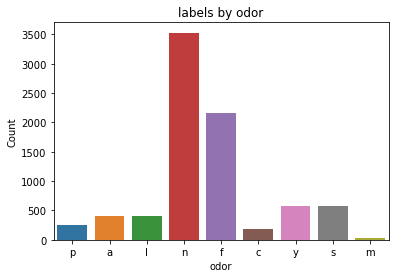

In [17]:
## 1. odor

sns.countplot(dataset['odor'])
    
plt.title("labels by odor")
plt.ylabel("Count")

In [18]:
dataset.population.value_counts()

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

Text(0, 0.5, 'Count')

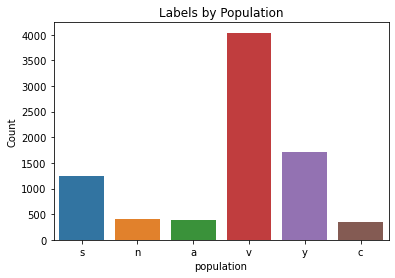

In [19]:
## 1. odor

sns.countplot(dataset['population'])
    
plt.title("Labels by Population")
plt.ylabel("Count")

#### Label Encoding :-

In [20]:
#Label encoding:-

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['class'] = le.fit_transform(dataset['class'])

In [21]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### One-Hot Encoding :-

In [22]:
dataset=pd.get_dummies(dataset)

dataset.head(10)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


###### Splitting into feature set and class labels

In [23]:
# Creating feature vector and target vector.
X = dataset.drop("class", axis=1)
y = dataset["class"]


# Constant features 
[col for col in X.columns if X[col].nunique() == 1]

['veil-type_p']

#### Splitting the dataset into Training set and Test Set :-

In [24]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test...

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state= 42)

#### Feature Scaling : -

###### Standardization/Normalisation

In [25]:
scale = StandardScaler()
X = scale.fit_transform(X)

###   Classification Models:

###### 1.Logistic Regression Model:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

log_reg = LogisticRegression()
model = log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)

In [27]:

print('Accuracy of Logistic Regression model is :',accuracy_score(y_test,y_pred)*100)
print("Precision is :",precision_score(y_test,y_pred,average='weighted'))
print("Recall is : ",recall_score(y_test,y_pred,average='weighted'))
print("F1 Score is :",f1_score(y_test,y_pred,average='weighted'))

Accuracy of Logistic Regression model is : 100.0
Precision is : 1.0
Recall is :  1.0
F1 Score is : 1.0


In [28]:
confusion_matrix(y_test,y_pred)



array([[1040,    0],
       [   0,  991]], dtype=int64)

In [29]:
# cm = confusion_matrix(y_test,y_pred)

#x_axis_labels = ["Edible", "Poisonous"]
#y_axis_labels = ["Edible", "Poisonous"]
#f, ax = plt.subplots(figsize =(7,7))
#sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.xlabel("Label Predicted")
# plt.ylabel("True label")
# plt.title('Confusion Matrix of Logistic Regression Model')
  ##( plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight'))
#plt.show()

##### 2. KNN Classification Model

In [30]:
model = KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [31]:
print('The accuracy of KNN model is : ', accuracy_score(prediction,y_test)*100)
print("Precision is : ",precision_score(prediction,y_test,average = 'weighted'))
print("Recall is : ",recall_score(prediction,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(prediction,y_test,average ='weighted'))

The accuracy of KNN model is :  100.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0


In [32]:
confusion_matrix(prediction,y_test)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [33]:
# cm = confusion_matrix(prediction,y_test)
# x_axis_labels = ["Edible", "Poisonous"]
#y_axis_labels = ["Edible", "Poisonous"]
# f, ax = plt.subplots(figsize =(7,7))
  # sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
# plt.xlabel("Label Predicted")
# plt.ylabel("True label")
 # plt.title('Confusion Matrix of KNN Model of Classifier')
        #plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
 # plt.show()

#### 3.Random Forest Classification Model :

In [34]:
rnf = RandomForestClassifier(n_estimators=100)
rnf_model = rnf.fit(X_train, y_train)
rnf_predict = rnf_model.predict(X_test)

In [35]:
rnf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
rnf_predict=rnf.predict(X_test)

In [37]:
print('Accuracy of Random Forest model is : ',accuracy_score(rnf_predict, y_test) *100)
print("Precision is : ",precision_score(rnf_predict,y_test,average = 'weighted'))
print("Recall is : ",recall_score(rnf_predict,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(rnf_predict,y_test,average ='weighted'))

Accuracy of Random Forest model is :  100.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0


In [38]:
confusion_matrix(y_test,rnf_predict)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [39]:
 #cm = confusion_matrix(y_test,rnf_predict)
 #x_axis_labels = ["Edible", "Poisonous"]
 #y_axis_labels = ["Edible", "Poisonous"]
 #f, ax = plt.subplots(figsize =(7,7))
 #sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.xlabel("Label Predicted")
#plt.ylabel("True label")
#plt.title('Confusion Matrix of Random forest Classifier')
        #plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
 #plt.show()

##### 4. Decision Tree Classification Model

In [40]:
dtree = DecisionTreeClassifier()
dtree_model = dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)

In [41]:
print('Accuracy of Decision Tree model is : ', accuracy_score(dtree_predict, y_test)*100)
print("Precision is : ",precision_score(dtree_predict,y_test,average = 'weighted'))
print("Recall is : ",recall_score(dtree_predict,y_test,average = 'weighted'))
print("F1 Score is : ",f1_score(dtree_predict,y_test,average ='weighted'))

Accuracy of Decision Tree model is :  100.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0


In [42]:
confusion_matrix(y_test,dtree_predict)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [43]:
#cm = confusion_matrix(y_test,dtree_predict)
#x_axis_labels = ["Edible", "Poisonous"]
#y_axis_labels = ["Edible", "Poisonous"]
  #f, ax = plt.subplots(figsize =(7,7))
#sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.xlabel("Label Predicted")
#plt.ylabel("True label")
#plt.title('Confusion Matrix of Decision Tree Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
#plt.show()

##### 5.Support Vector Machine Model of Classification : (SVC)

In [44]:
from sklearn import svm 
from sklearn.svm import SVC

In [45]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
pred=svm_linear.predict(X_test)

In [46]:
print('The accuracy of Support Vector Machine model is: ', accuracy_score(pred,y_test)*100)
print("Precision is : ",precision_score(pred,y_test,average='weighted'))
print("Recall is : ",recall_score(pred,y_test,average='weighted'))
print("F1 Score is : ",f1_score(pred,y_test,average='weighted'))

The accuracy of Support Vector Machine model is:  100.0
Precision is :  1.0
Recall is :  1.0
F1 Score is :  1.0


In [47]:
confusion_matrix(y_test,pred)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [48]:
#cm = confusion_matrix(y_test,pred)
#x_axis_labels = ["Edible", "Poisonous"]
#y_axis_labels = ["Edible", "Poisonous"]
#f, ax = plt.subplots(figsize =(7,7))
#sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.xlabel("Label Predicted")
#plt.ylabel("True label")
#plt.title('Confusion Matrix of SVM Model Classifier')
        #plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
#plt.show()

#### 6. Gradient Boosting Classifier :-

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_predict=gb.predict(X_test)

In [50]:
print("Accuracy is:",accuracy_score(y_test,y_predict)*100)
print("Precision is:",precision_score(y_test,y_predict,average='weighted'))
print("Recall is:",recall_score(y_test,y_predict,average='weighted'))
print("F1 Score is:",f1_score(y_test,y_predict,average='weighted'))

Accuracy is: 100.0
Precision is: 1.0
Recall is: 1.0
F1 Score is: 1.0


In [51]:
confusion_matrix(y_test,y_predict)

array([[1040,    0],
       [   0,  991]], dtype=int64)

In [52]:

#cm = confusion_matrix(y_test,y_predict)
#x_axis_labels = ["Edible", "Poisonous"]
#y_axis_labels = ["Edible", "Poisonous"]
#f, ax = plt.subplots(figsize =(7,7))
#sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
#plt.xlabel("Label Predicted")
#plt.ylabel("True label")
#plt.title('Confusion Matrix of Gradient Boosting Classifier')
        #plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
#plt.show()

####  Implementing Naive Bayes Model based on Probabilistic Classification :-

##### Fitting Gaussian Naive Bayes to theTraining Set :-

In [53]:
g_NB = GaussianNB()
type1 = g_NB.fit(X_train, y_train)
g_NBpredict = type1.predict(X_test)

print("The accuracy score of Gaussian Naive Bayes is : ", accuracy_score(y_test, g_NBpredict)*100)


The accuracy score of Gaussian Naive Bayes is :  96.01181683899557


In [54]:
##Making the confusion Matrix


confusion_matrix(y_test,g_NBpredict)

array([[959,  81],
       [  0, 991]], dtype=int64)

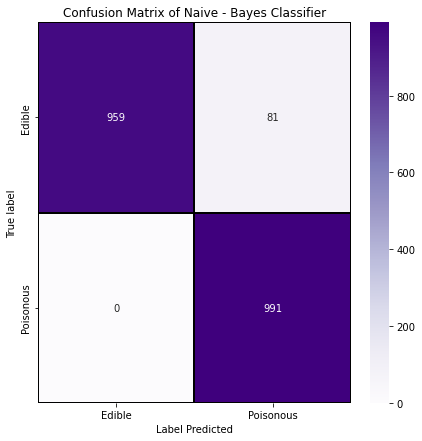

In [55]:
cm = confusion_matrix(y_test,g_NBpredict)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Label Predicted")
plt.ylabel("True label")
plt.title('Confusion Matrix of Naive - Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [56]:
print('Accuracy of Logistic Regression model is :',accuracy_score(y_test,y_pred)*100)
print('The accuracy of KNN model is : ', accuracy_score(prediction,y_test)*100)
print('Accuracy of Random Forest model is : ',accuracy_score(rnf_predict, y_test) *100)
print('Accuracy of Decision Tree model is : ', accuracy_score(dtree_predict, y_test)*100)
print('The accuracy of Support Vector Machine model is: ', accuracy_score(pred,y_test)*100)
print("Accuracy of Gradient Boosting Calssifier is :",accuracy_score(y_test,y_predict)*100)

print("The accuracy score of Gaussian Naive Bayes is : ", accuracy_score(y_test, g_NBpredict)*100)

Accuracy of Logistic Regression model is : 100.0
The accuracy of KNN model is :  100.0
Accuracy of Random Forest model is :  100.0
Accuracy of Decision Tree model is :  100.0
The accuracy of Support Vector Machine model is:  100.0
Accuracy of Gradient Boosting Calssifier is : 100.0
The accuracy score of Gaussian Naive Bayes is :  96.01181683899557


###   Conclusion:-


### A 100% accuracy has been obtained from all the classificaion models whereas an accuracy of 96% is obtained on implementing the Gaussian Naive - Bayes Model in this mushrooms dataset.